In [7]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress

In [5]:
# The path to the CSV file
file = "../Data/Global_Mobility_Report.csv"

# Read our mobility data into pandas
# It is a big original file with total of 1648861 rows × 14 columns
# i used low_memory=False, to open it, but there are better ways
google_mob_df = pd.read_csv(file,low_memory=False)
google_mob_df

FileNotFoundError: [Errno 2] File ../Data/Global_Mobility_Report.csv does not exist: '../Data/Global_Mobility_Report.csv'

In [11]:
# Selecting only the data for the US. This dropped the data to 456634 rows × 14 columns
google_mob_US_df = google_mob_df.loc[google_mob_df["country_region_code"] == "US"]
google_mob_US_df = google_mob_US_df.reset_index(drop = True)
google_mob_US_df
# # exprot the file so it can be loaded/uploaded 
google_mob_US_df.to_csv("../Data/Global_Mobility_Report_US.csv")
google_mob_US_df


NameError: name 'google_mob_df' is not defined

In [8]:
# Loads the new Us file, to avoid loading the Global file and slowing down the computer, every time the Kernel is restarted
file_us = "../Data/Global_Mobility_Report_US.csv"
google_mob_US_df = pd.read_csv(file_us)
google_mob_US_df.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,1,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,2,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,3,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,4,US,United States,NaN,NaN,NaN,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [9]:
# Cleaning the data and droping columns that are not needed
clean_google_mob_US_df = google_mob_US_df.drop(["Unnamed: 0","country_region","iso_3166_2_code","census_fips_code","metro_area"], axis = 1)
clean_google_mob_US_df.head(50)

,country_region_code,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
5,US,NaN,NaN,2020-02-20,1.0,0.0,4.0,0.0,0.0,1.0
6,US,NaN,NaN,2020-02-21,2.0,-2.0,4.0,1.0,0.0,0.0
7,US,NaN,NaN,2020-02-22,7.0,3.0,23.0,5.0,4.0,-1.0
8,US,NaN,NaN,2020-02-23,7.0,3.0,23.0,5.0,2.0,-1.0
9,US,NaN,NaN,2020-02-24,2.0,1.0,9.0,1.0,3.0,0.0


In [10]:
# Renaming the columns
clean_google_mob_US_df.rename(columns = {"country_region_code":"Country",
                                         "sub_region_1":"State","sub_region_2":"County",
                                         "retail_and_recreation_percent_change_from_baseline":"retail_and_recreation",
                                         "grocery_and_pharmacy_percent_change_from_baseline":"grocery_and_pharmacy",
                                         "parks_percent_change_from_baseline":"parks",
                                         "transit_stations_percent_change_from_baseline":"transit_stations",
                                         "workplaces_percent_change_from_baseline":"workplaces",
                                         "residential_percent_change_from_baseline":"residential"}, inplace = True)
clean_google_mob_US_df


,Country,State,County,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,US,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
456629,US,Wyoming,Weston County,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN
456630,US,Wyoming,Weston County,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN
456631,US,Wyoming,Weston County,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN
456632,US,Wyoming,Weston County,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN


In [11]:
# Checking the number of total states to better undestand the data...its 52
totalstates = len(clean_google_mob_US_df["State"].unique())
totalstates

52

In [12]:
# Drop the Na from the column State so we will end up with 51 States
clean_google_mob_US_df.dropna(subset=["State"], inplace = True)
clean_google_mob_US_df
# Checking the number of states
totalstates = len(clean_google_mob_US_df["State"].unique())
totalstates

51

In [13]:
# Resetinh the inddex and saving the cleaned file to cvs
clean_google_mob_US_df = clean_google_mob_US_df.reset_index(drop = True)
clean_google_mob_US_df.to_csv("../Data/clean_google_mob_US.csv")

In [14]:
clean_google_mob_US_df

,Country,State,County,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,US,Alabama,NaN,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0
1,US,Alabama,NaN,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0
2,US,Alabama,NaN,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0
3,US,Alabama,NaN,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0
4,US,Alabama,NaN,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
456457,US,Wyoming,Weston County,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN
456458,US,Wyoming,Weston County,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN
456459,US,Wyoming,Weston County,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN
456460,US,Wyoming,Weston County,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN


In [73]:
# Grouping by data, so we can get all the data for all states into one date
data_by_date_df = pd.DataFrame(clean_google_mob_US_df.groupby("date").mean())
data_by_date_df.reset_index(inplace = True)
data_by_date_df

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
112,2020-06-06,-8.199770,8.927181,65.952862,-5.368366,-9.018106,3.863061
113,2020-06-07,-4.136010,6.096278,71.095890,-6.350270,-12.516920,3.274008
114,2020-06-08,-4.369511,4.571992,51.386809,-10.121094,-25.351283,8.604668
115,2020-06-09,-4.713932,5.444882,50.257194,-10.035957,-26.391258,9.501757
116,2020-06-10,-2.318182,6.735700,58.032491,-8.013423,-26.243544,9.053547
117,2020-06-11,-2.341682,8.097449,63.436229,-6.574856,-26.394255,8.740378
118,2020-06-12,-5.654616,6.220974,72.423358,-4.642384,-26.486369,8.280523
119,2020-06-13,-5.117344,9.476812,87.832117,0.078326,-6.575814,2.627429
120,2020-06-14,-0.756652,6.758704,95.670863,-0.418502,-10.202269,2.169643
121,2020-06-15,-1.521957,5.555043,60.183521,-6.331041,-25.097428,7.954096


In [41]:
# Removes the year "2020" from the data, Since all the data is only from 2020, we dont need it. 
data_by_date_df["date"] = (data_by_date_df["date"].astype('datetime64')).dt.strftime("%m-%d")
data_by_date_df

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,02-15,6.438490,2.379197,16.658416,4.307071,0.440225,-0.550276
1,02-16,7.986974,2.511178,17.796895,3.752110,0.484000,-0.661800
2,02-17,3.865043,-0.345417,27.884146,1.819767,-17.579826,4.363513
3,02-18,-0.193205,-1.269649,5.354559,2.244722,-0.005492,0.794469
4,02-19,2.079870,0.579322,7.988439,2.475737,0.884418,0.177460
...,...,...,...,...,...,...,...
167,07-31,-3.338162,5.251713,68.145488,-3.857418,-28.497639,7.663490
168,08-01,-4.665718,7.484454,81.304189,1.590763,-9.850601,2.382151
169,08-02,-1.311211,4.662641,76.178253,0.365062,-12.422342,2.327806
170,08-03,1.516552,7.114116,56.354717,-6.108588,-27.709433,7.375178


In [42]:
start_date = "02-15"
end_date = "03-15"
mask = (data_by_date_df["date"] > start_date) & (data_by_date_df["date"] <= end_date)
first_month_df = data_by_date_df.loc[mask]
first_month_df.head(10)


,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
1,02-16,7.986974,2.511178,17.796895,3.752110,0.484000,-0.661800
2,02-17,3.865043,-0.345417,27.884146,1.819767,-17.579826,4.363513
3,02-18,-0.193205,-1.269649,5.354559,2.244722,-0.005492,0.794469
4,02-19,2.079870,0.579322,7.988439,2.475737,0.884418,0.177460
5,02-20,0.178816,-0.153687,-1.258503,1.946819,-0.338327,1.141050
6,02-21,2.582249,-1.531376,6.477273,3.486137,0.500560,0.733639
7,02-22,8.164567,3.513758,35.328496,6.437374,3.060849,-1.102285
8,02-23,8.603403,3.982744,32.066580,6.770789,2.496729,-0.817412
9,02-24,1.641322,0.118015,7.187143,0.905314,2.828835,0.388713
10,02-25,4.543594,0.774707,8.073025,2.263663,1.178755,0.174104


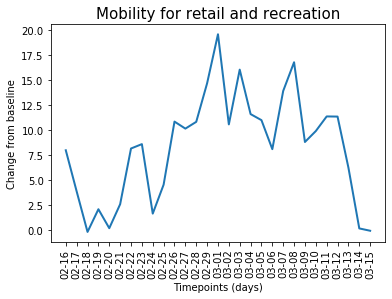

In [43]:
plt.plot(first_month_df["date"], 
         first_month_df["retail_and_recreation"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Mobility for retail and recreation", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Change from baseline")
plt.xticks(rotation=90)
# plt.hlines(0,0,10,alpha = 0.5) 
plt.show()

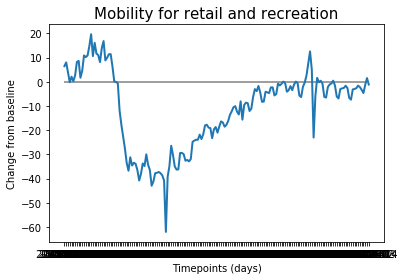

In [33]:
# The plot should be made fancyer, better colors, bigger, etc..
# Ploting a single plot as a example
plt.plot(data_by_date_df["date"], 
         data_by_date_df["retail_and_recreation"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Mobility for retail and recreation", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Change from baseline")
plt.hlines(0,0,170,alpha = 0.5) 
plt.show()

In [ ]:
# The data from apple is based on people destination searches, the data from google (this on) is based on the actual location
# One of the questions can be, what people searched on apple device and what actually happend, based on google data.

# Few limitations are.. i guess people dont search for places they know. 
# If im not going to work and i dont travel to new places, 
# since traveling was restricted
# i will go to places in my area and i will not use the search function... 
# also i will only search the first time and then i will know...



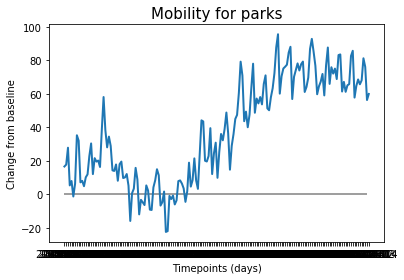

In [34]:
# Lets check the parks!
plt.plot(data_by_date_df["date"], 
         data_by_date_df["parks"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Mobility for parks", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Change from baseline")
plt.hlines(0,0,170,alpha = 0.5) 
plt.show()

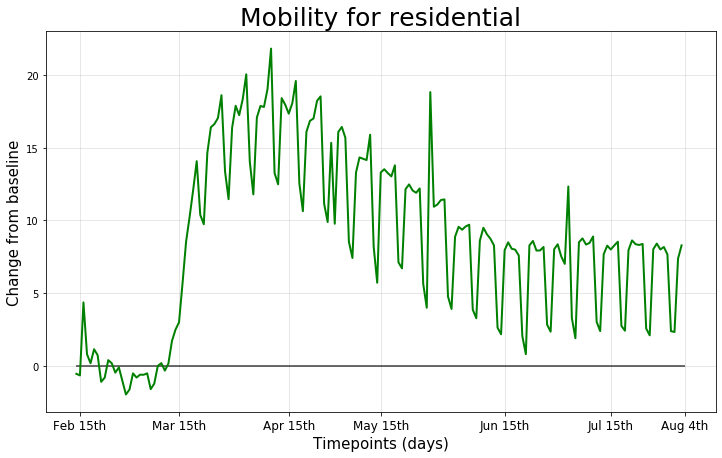

In [90]:
# The residential column can give answer to what extend people were following the stay at home guidelines
plt.plot(data_by_date_df["date"], 
         data_by_date_df["residential"],
         linewidth=2, c = "g")

# Adding title, x labels and y labels
plt.title("Mobility for residential", size = 25)
plt.xlabel("Timepoints (days)", size = 15)
plt.ylabel("Change from baseline", size = 15)
plt.hlines(0,0,172,alpha = 0.75) 
plt.rcParams['figure.figsize'] = [12, 7]
# plt.xticks(rotation=90)
plt.grid(linestyle ="-", linewidth = 1, alpha = 0.3)
total = len(data_by_date_df["date"])
total
# Place the ticks at a location. there are 172 data points in data_by_date_df["date"].
# Starts with Feb 15 so that will be position 1. end at August 4th so that will be position 172
# the rest i filled up manually. Basicaly opened the data and saw at what indeh is MAr15, April 15th etc...
plt.xticks([1, 29, 60, (total/2), 121, 151, (total)],
           ["Feb 15th", "Mar 15th", "Apr 15th", "May 15th", "Jun 15th", "Jul 15th", "Aug 4th"], fontsize = "large")

plt.savefig("Mobility_for_residential.png", dpi = 100)
plt.show()

In [46]:
start_date = "05-01"
end_date = "05-31"
mask = (data_by_date_df["date"] > start_date) & (data_by_date_df["date"] <= end_date)
april_month_df = data_by_date_df.loc[mask]
april_month_df.head(10)

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
77,05-02,-23.677076,2.276888,44.234177,-18.320408,-22.666971,8.533084
78,05-03,-21.702619,-1.754669,43.565485,-22.642259,-25.599428,7.420085
79,05-04,-18.048055,-1.151988,20.093604,-21.842654,-32.460957,13.287509
80,05-05,-17.754123,2.711811,19.635930,-19.976258,-33.889961,14.341912
81,05-06,-18.947054,1.088258,22.916399,-19.343896,-33.852647,14.246345
82,05-07,-19.150576,2.742636,39.564924,-18.875468,-33.757337,14.159590
83,05-08,-23.322034,0.135447,12.134831,-21.755898,-33.365907,15.905819
84,05-09,-19.644102,12.981761,24.499305,-17.869436,-20.059763,8.197775
85,05-10,-18.715944,7.787435,30.891654,-20.963077,-22.032243,5.716826
86,05-11,-21.021374,-4.555035,9.898305,-20.731244,-30.839885,13.310395


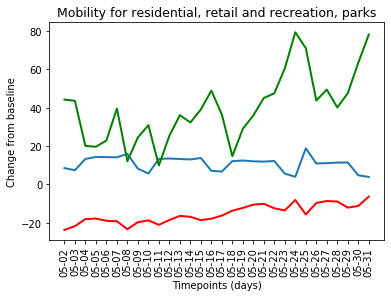

In [45]:
plt.plot(april_month_df["date"], 
         april_month_df["residential"],
         linewidth=2, label = "Residential")

plt.plot(april_month_df["date"], 
         april_month_df["parks"],
         linewidth=2, label = "Parks", color="Green")

plt.plot(april_month_df["date"], 
         april_month_df["retail_and_recreation"],
         linewidth=2, label = "retail_and_recreation", color="Red")


# Adding title, x labels and y labels
plt.title("Mobility for residential, retail and recreation, parks", size = 12.5)
plt.xlabel("Timepoints (days)")
plt.ylabel("Change from baseline")
plt.xticks(rotation=90)
# plt.figure(figsize=(10,5))
plt.rcParams['figure.figsize'] = [7, 4]
# plt.hlines(0,0,10,alpha = 0.5) 
plt.savefig('fig7.png', dpi = 100)
plt.show()

In [45]:
# I wonder if the spikes, are for the actual weekends? We should further analyze that, 
# and if it confirms, it wll be an intresting observation. 
# Meaning when the stay at home, recommendation was issued, 
# people were respecting it and staying home, but were still like, Its weekend lets go out-or somewhere. 


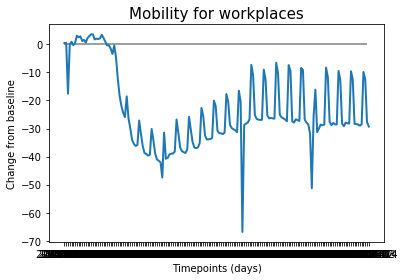

In [36]:
plt.plot(data_by_date_df["date"], 
         data_by_date_df["workplaces"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Mobility for workplaces", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Change from baseline")
plt.hlines(0,0,170,alpha = 0.5) 
plt.show()

In [85]:
# I did this part last, and afted i did it i figured out its a waste of time.
# The data is cumulative so it doesent show really anything
# i was hoping to plot a line from which i can see how the change in mobility affected the new covid cases
# For that purpoce, the data should be daily new cases, and not total cases


# NY times has a free data, for covid cases, per state the file is in the data folder
# The path to the CSV file
file3 = "../Data/us-states.csv"

# Read the ny times covid data into pandas
nytimes_covid = pd.read_csv(file3)
nytimes_covid

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
8919,2020-08-11,Virginia,51,101745,2344
8920,2020-08-11,Washington,53,66620,1786
8921,2020-08-11,West Virginia,54,7875,147
8922,2020-08-11,Wisconsin,55,66146,1017


In [87]:
# The google data starts at 2020-02-15, so before merging, we will drop all the data from the nytimes before 2020-02-15
# locating the index of 2020-02-15, it will appear multiple times, but we only need the last one.
x = nytimes_covid.loc[nytimes_covid["date"] == "2020-02-15"].index[-1]
# x =np.arange(x)
nytimes_covidx = nytimes_covid.drop(np.arange(x))
nytimes_covid_clean = nytimes_covidx.drop(["fips"], axis = 1)
nytimes_covid_clean.rename(columns={"state":"State","cases": "Covid cases", "deaths":"Covid deaths"}, inplace =True)
nytimes_covid_clean

,date,State,Covid cases,Covid deaths
121,2020-02-15,Wisconsin,1,0
122,2020-02-16,Arizona,1,0
123,2020-02-16,California,7,0
124,2020-02-16,Illinois,2,0
125,2020-02-16,Massachusetts,1,0
...,...,...,...,...
8919,2020-08-11,Virginia,101745,2344
8920,2020-08-11,Washington,66620,1786
8921,2020-08-11,West Virginia,7875,147
8922,2020-08-11,Wisconsin,66146,1017


In [90]:
# Creating a dataframe that shows the total number of covid cases
covid_data_by_date_df = pd.DataFrame(nytimes_covid_clean.groupby("date").sum())
covid_data_by_date_df.reset_index(inplace = True)
covid_data_by_date_df

,date,Covid cases,Covid deaths
0,2020-02-15,1,0
1,2020-02-16,15,0
2,2020-02-17,25,0
3,2020-02-18,25,0
4,2020-02-19,25,0
...,...,...,...
174,2020-08-07,4950708,160977
175,2020-08-08,5005904,161942
176,2020-08-09,5054258,162481
177,2020-08-10,5101384,163018


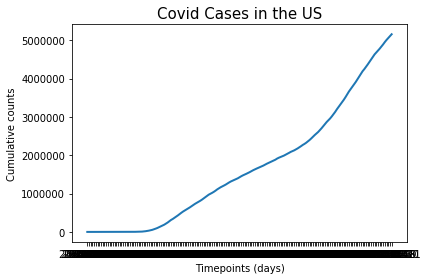

In [92]:
plt.plot(covid_data_by_date_df["date"], 
         covid_data_by_date_df["Covid cases"],
         linewidth=2)

# Adding title, x labels and y labels
plt.title("Covid Cases in the US", size = 15)
plt.xlabel("Timepoints (days)")
plt.ylabel("Cumulative counts")
plt.show()

In [89]:
# merging the two dataframes, just because. dont have an idea why, yet.
result = pd.merge(clean_google_mob_US_df, nytimes_covid_clean, how = "left", on=["date", "State"])
result

,Country,State,County,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Covid cases,Covid deaths
0,US,Alabama,NaN,2020-02-15,5.0,2.0,39.0,7.0,2.0,-1.0,NaN,NaN
1,US,Alabama,NaN,2020-02-16,0.0,-2.0,-7.0,3.0,-1.0,1.0,NaN,NaN
2,US,Alabama,NaN,2020-02-17,3.0,0.0,17.0,7.0,-17.0,4.0,NaN,NaN
3,US,Alabama,NaN,2020-02-18,-4.0,-3.0,-11.0,-1.0,1.0,2.0,NaN,NaN
4,US,Alabama,NaN,2020-02-19,4.0,1.0,6.0,4.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
456457,US,Wyoming,Weston County,2020-07-29,NaN,NaN,NaN,NaN,-29.0,NaN,2628.0,26.0
456458,US,Wyoming,Weston County,2020-07-30,NaN,NaN,NaN,NaN,-29.0,NaN,2686.0,26.0
456459,US,Wyoming,Weston County,2020-07-31,NaN,NaN,NaN,NaN,-26.0,NaN,2726.0,26.0
456460,US,Wyoming,Weston County,2020-08-03,NaN,NaN,NaN,NaN,-26.0,NaN,2848.0,27.0
